<a href="https://colab.research.google.com/github/hariharannatesh/Dimension-Estimation-from-Depth-Map-of-Monocular-Image/blob/master/encoder_dimest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras import Input
from google.colab.patches import cv2_imshow
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

2079
(424, 512)
(2079, 424, 512, 1)
(2079, 4)
(2079,)


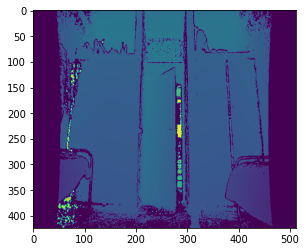

In [ ]:
X=np.load('/content/drive/My Drive/Dataset/Autoencoder_arrays/Final Array after concatenation/images_depth_autoencoder.npy')
coordinates=np.load('/content/drive/My Drive/Dataset/Autoencoder_arrays/Final Array after concatenation/coordinates_autoencoder.npy')
Y=np.load('/content/drive/My Drive/Dataset/Autoencoder_arrays/Final Array after concatenation/target_depth_autoencoder.npy')
print(len(X))
print(X[0].shape)
plt.imshow(X[0])
X=np.reshape(X,(len(X),424,512,1))
X=X/255.0
print(X.shape)
print(coordinates.shape)
print(Y.shape)

In [ ]:
encoder=load_model('/content/drive/My Drive/save_model/autoencoder_encoder_to_dimest_dg.h5')

In [ ]:
encoded_X=encoder.predict(X)
print(encoded_X.shape)

(2079, 53, 32, 32)


In [ ]:
encoded_X_flat=encoded_X.reshape(2079,53*32*32)
print(encoded_X_flat.shape)
encoded_Xcoord=np.concatenate((encoded_X_flat,coordinates),axis=1)
print(encoded_Xcoord.shape)
print(len(encoded_Xcoord))

(2079, 54272)
(2079, 54276)
2079


In [ ]:
eX_train,eX_test,Y_train,Y_test=train_test_split(encoded_Xcoord,Y,test_size=0.2,random_state=100)

In [ ]:
print(eX_train.shape)
print(eX_test.shape)

(1663, 54276)
(416, 54276)


In [ ]:
input_val=Input(shape=(54276,))
nn=Dense(1000,activation='relu',use_bias=True)(input_val)
nn=BatchNormalization()(nn)
nn=Dense(100,activation='relu',use_bias=True)(nn)
output=Dense(1)(nn)

In [ ]:
dimest_model=Model(input_val,output)
dimest_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 54276)]           0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              54277000  
_________________________________________________________________
batch_normalization_2 (Batch (None, 1000)              4000      
_________________________________________________________________
dense_13 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 54,381,201
Trainable params: 54,379,201
Non-trainable params: 2,000
_________________________________________________________________


In [ ]:
file_path='/content/drive/My Drive/save_model/dimestencoder_dg_bn200.h5'
mc=ModelCheckpoint(filepath=file_path,monitor='val_loss',mode='auto',verbose=1,save_best_only=True,save_freq='epoch')

In [ ]:
dimest_model.compile(optimizer='rmsprop',loss='mean_squared_error')
history=dimest_model.fit(x=eX_train,y=Y_train,shuffle=1,validation_split=0.2,initial_epoch=0,epochs=200,callbacks=[mc])

Epoch 1/200
42/42 [==============================] - ETA: 0s - loss: 3321.7109
Epoch 00001: val_loss improved from inf to 3923.34351, saving model to /content/drive/My Drive/save_model/dimestencoder_dg_bn200.h5
42/42 [==============================] - 24s 569ms/step - loss: 3321.7109 - val_loss: 3923.3435
Epoch 2/200
42/42 [==============================] - ETA: 0s - loss: 632.7853
Epoch 00002: val_loss improved from 3923.34351 to 2369.94775, saving model to /content/drive/My Drive/save_model/dimestencoder_dg_bn200.h5
42/42 [==============================] - 25s 605ms/step - loss: 632.7853 - val_loss: 2369.9478
Epoch 3/200
42/42 [==============================] - ETA: 0s - loss: 396.7821
Epoch 00003: val_loss did not improve from 2369.94775
42/42 [==============================] - 23s 547ms/step - loss: 396.7821 - val_loss: 2569.0469
Epoch 4/200
42/42 [==============================] - ETA: 0s - loss: 444.4599
Epoch 00004: val_loss did not improve from 2369.94775
42/42 [===============

123.0
(54276,)
[[113.89099]]
[[60.69983]] 59.0
[[123.83758]] 109.0
[[54.49187]] 51.0
[[92.978455]] 100.0


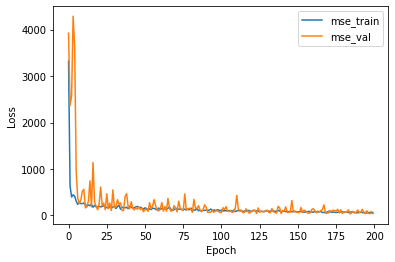

In [ ]:
# With Batch Normalization(200 EPOCHS)
plt.plot(history.history['loss'],label='mse_train')
plt.plot(history.history['val_loss'],label='mse_val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim(0,15000)
plt.legend(loc='upper right')

print(Y_test[0])
print(eX_test[0].shape)
dimest_model_best=load_model('/content/drive/My Drive/save_model/dimestencoder_dg_bn200.h5')
predicted=dimest_model_best.predict(eX_test[0].reshape(1,54276))
print(predicted)

print(dimest_model_best.predict(eX_test[20].reshape(1,54276)),Y_test[20])
print(dimest_model_best.predict(eX_test[78].reshape(1,54276)),Y_test[78])
print(dimest_model_best.predict(eX_test[120].reshape(1,54276)),Y_test[120])
print(dimest_model_best.predict(eX_test[270].reshape(1,54276)),Y_test[270])


13/13 [==============================] - 1s 98ms/step - loss: 35.4485


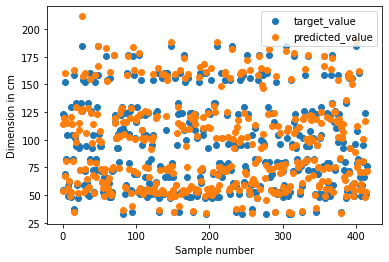

In [ ]:
dimest_model_best.save('/content/drive/My Drive/save_model/dimestencoder_dg_bn200.h5')

dimest_model_best.evaluate(eX_test,Y_test)
predicted=dimest_model_best.predict(eX_test)
plt.scatter(range(len(eX_test)),Y_test,label='target_value')
plt.scatter(range(len(eX_test)),predicted,label='predicted_value')
plt.xlabel('Sample number')
plt.ylabel('Dimension in cm')
plt.legend(loc='upper right')

123.0
(54276,)
[[122.4094]]
[[54.807472]] 59.0
[[126.14602]] 109.0
[[53.840805]] 51.0
[[107.21047]] 100.0


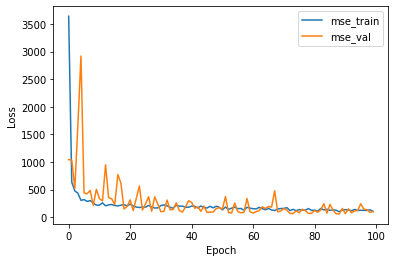

In [ ]:
# With Batch Normalization(100 EPOCHS)[DONT RUN.. JUST FOR REFERENCE]

plt.plot(history.history['loss'],label='mse_train')
plt.plot(history.history['val_loss'],label='mse_val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim(0,15000)
plt.legend(loc='upper right')

print(Y_test[0])
print(eX_test[0].shape)
dimest_model_best=load_model('/content/drive/My Drive/save_model/dimestencoder_dg_bn.h5')
predicted=dimest_model_best.predict(eX_test[0].reshape(1,54276))
print(predicted)

print(dimest_model_best.predict(eX_test[20].reshape(1,54276)),Y_test[20])
print(dimest_model_best.predict(eX_test[78].reshape(1,54276)),Y_test[78])
print(dimest_model_best.predict(eX_test[120].reshape(1,54276)),Y_test[120])
print(dimest_model_best.predict(eX_test[270].reshape(1,54276)),Y_test[270])





13/13 [==============================] - 1s 101ms/step - loss: 64.6171


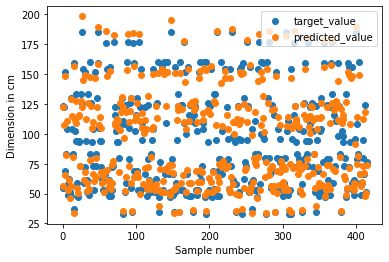

In [ ]:
dimest_model_best.save('/content/drive/My Drive/save_model/dimestencoder_dg_bn.h5')

dimest_model_best.evaluate(eX_test,Y_test)
predicted=dimest_model_best.predict(eX_test)
plt.scatter(range(len(eX_test)),Y_test,label='target_value')
plt.scatter(range(len(eX_test)),predicted,label='predicted_value')
plt.xlabel('Sample number')
plt.ylabel('Dimension in cm')
plt.legend(loc='upper right')

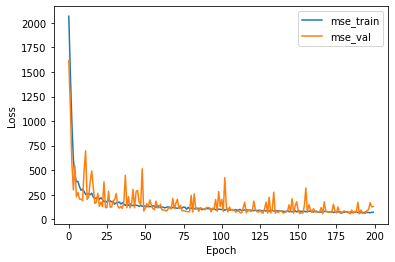

In [ ]:
#With L2 REGULARIZATION [DONT RUN.. JUST FOR REFERENCE]

plt.plot(history.history['loss'],label='mse_train')
plt.plot(history.history['val_loss'],label='mse_val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim(0,15000)
plt.legend(loc='upper right')

In [ ]:
print(Y_test[0])
print(eX_test[0].shape)
dimest_model_best=load_model('/content/drive/My Drive/save_model/dimestencoder_dg.h5')
predicted=dimest_model_best.predict(eX_test[0].reshape(1,54276))
print(predicted)

123.0
(54276,)
[[117.35509]]


In [ ]:
print(dimest_model_best.predict(eX_test[20].reshape(1,54276)),Y_test[20])
print(dimest_model_best.predict(eX_test[78].reshape(1,54276)),Y_test[78])
print(dimest_model_best.predict(eX_test[120].reshape(1,54276)),Y_test[120])
print(dimest_model_best.predict(eX_test[270].reshape(1,54276)),Y_test[270])

[[64.78313]] 59.0
[[120.856]] 109.0
[[62.2499]] 51.0
[[101.8189]] 100.0


In [ ]:
dimest_model_best.save('/content/drive/My Drive/save_model/dimestencoder_dg.h5')

In [ ]:
dimest_model_best.evaluate(eX_test,Y_test)

13/13 [==============================] - 2s 145ms/step - loss: 53.5134


53.51342010498047

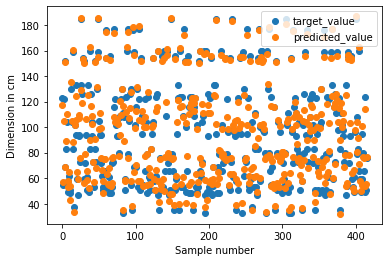

In [ ]:
predicted=dimest_model_best.predict(eX_test)
plt.scatter(range(len(eX_test)),Y_test,label='target_value')
plt.scatter(range(len(eX_test)),predicted,label='predicted_value')
plt.xlabel('Sample number')
plt.ylabel('Dimension in cm')
plt.legend(loc='upper right')